# Ggplot
### Mark Klik and Misja Mikkers


In this notebook we will practice with ggplot. The idea is that we will work -step by step- towards some graphs.

## Packages

The `ggplot2` package part of the `tidyverse`. Apart from `ggplot2` we will also use the `ggrepel` and `readxl` packages

Load the necessary packages:

In [17]:
library(tidyverse)
library(readxl)
library(ggrepel)



## Background and design of the ggplot2 package

* In 2005  Hadley Wickham created ggplot as part of his PhD.
* ggplot is an implementation of the 'Grammar of Graphics' (Wilkinson, 2005). 
* `ggplot2` makes it possible to link a certain _aesthetic_ of a graph to a column in a dataframe. Examples of are _Aesthetics_ :

    - color fill
    - line color
    - line size
    - size and shape of points
    - transparancy (alpha)
    - x-coordinate
    - y-coordinate
    - line type
    - etc

## small example

We will use the data-set of Americain presidents available of `R`:


In [9]:
df <- presidential
df

name,start,end,party
Eisenhower,1953-01-20,1961-01-20,Republican
Kennedy,1961-01-20,1963-11-22,Democratic
Johnson,1963-11-22,1969-01-20,Democratic
Nixon,1969-01-20,1974-08-09,Republican
Ford,1974-08-09,1977-01-20,Republican
Carter,1977-01-20,1981-01-20,Democratic
Reagan,1981-01-20,1989-01-20,Republican
Bush,1989-01-20,1993-01-20,Republican
Clinton,1993-01-20,2001-01-20,Democratic
Bush,2001-01-20,2009-01-20,Republican


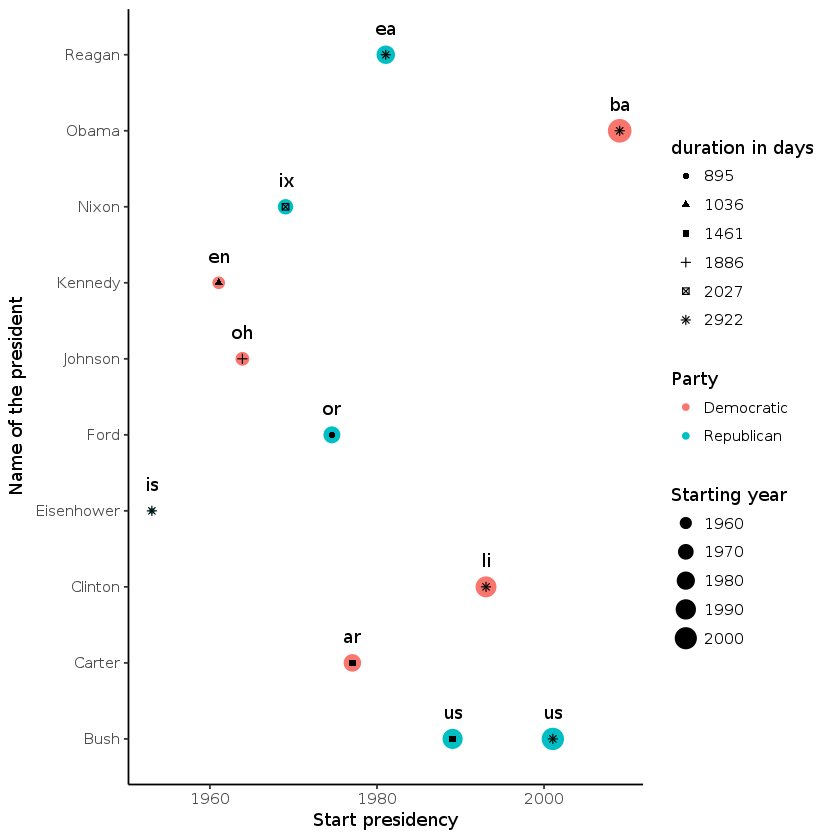

In [3]:
ggplot(df) +
  geom_point(aes(start, name, size = start, colour = party)) +
  geom_point(aes(start, name, shape = factor(end - start)), size = 1.5) +
  labs(shape = "duration in days", size = "Starting year", colour = "Party") +
  xlab("Start presidency") +
  ylab("Name of the president") +
  geom_text(aes(start, name, label = substr(name, 2, 3)), nudge_y = 0.35) +
theme_classic()

In this graph we constructed the following links between the _aesthetics_ and the columns:

* color of the points is linked to the party of the president
* the x-axis is linked to the starting year of the presidency
* the y-axis is linked to the name of the president
* the symbol type is linked to the number of days in office
* the letters are linked to the name of the president 

Of course, these links are meaningless. However, we use this as an illustration how linkes can be made.

## Data preparation

We will start with reading in the data:



* in _d1_: _OECD-Health-Statistics-2017-Frequently-Requested-Data.xls_, use sheet 2 and skip the first incorrect lines
* in _d2_: _OECD-Health-Statistics-2017-Frequently-Requested-Data.xls_, use _LE Total population at birth_  and skip the first incorrect lines.



In [26]:
d1<- read_xls("../sourcedata/OECD-Health-Statistics-2017-Frequently-Requested-Data.xls", sheet=2, skip=3)

d2<- read_xls("../sourcedata/OECD-Health-Statistics-2017-Frequently-Requested-Data.xls", sheet="LE Total population at birth", skip=3)
head(d1)
head(d2)



X__1,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,X__2,2016__1
Australia,..,4.544,4.544,4.507,5.109,5.757,5.773,6.073,5.935,...,8.588,8.468,8.586,8.726,8.806,9.079,9.445,9.59,NA,9.59
Austria,4.85,4.781,4.777,4.869,5.098,6.522,6.756,6.697,6.965,...,10.142,10.112,9.909,10.130,10.186,10.286,10.32,10.367,NA,10.367
Belgium,3.836,3.922,4.076,4.355,4.419,5.518,5.724,6.193,6.382,...,10.071,9.918,10.081,10.184,10.367,10.395,10.477,10.387,NA,10.387
Canada,6.353,6.611,6.528,6.207,6.091,6.538,6.574,6.553,6.526,...,10.574,10.562,10.220,10.223,10.115,9.987,10.254,10.335,NA,10.335
Chile,..,..,..,..,..,..,..,..,..,...,7.107,6.703,6.723,6.973,7.291,7.679,8.129,8.45,NA,8.45
Czech Republic,..,..,..,..,..,..,..,..,..,...,7.309,6.944,6.977,7.028,7.717,7.558,7.213,7.177,NA,7.177


X__1,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,X__2,2015 (or nearest year)
Australia,70.9,71.2,71,71.1,70.7,71,70.8,71.2,70.9,...,81.60,81.80,82.0,82.1,82.2,82.4,82.5,..,NA,82.5
Austria,68.7,69.7,69.4,69.6,70,69.8,70.2,70,70.2,...,80.40,80.70,81.1,81.0,81.2,81.6,81.3,..,NA,81.3
Belgium,69.8,70.6,70.3,70.1,70.9,70.7,70.8,71.1,70.8,...,80.10,80.30,80.7,80.5,80.7,81.4,81.1,..,NA,81.1
Canada,..,71.3,..,..,..,..,72,..,..,...,80.75,81.05,81.3,81.5,81.7,..,..,..,NA,81.7
Chile,..,..,..,..,..,..,..,..,..,...,78.20,78.00,78.7,78.7,79.5,79.7,79.1,79.2,NA,79.1
Czech Republic,70.7,70.7,69.9,70.5,70.7,70.4,70.6,70.5,70.1,...,77.40,77.70,78.0,78.2,78.3,78.9,78.7,..,NA,78.7


We will clean the data a bit:

In [27]:
d1a <- d1 %>%
  select(Country = X__1, as.character(1970:2016)) %>%  # why do we use 'as.character'?
  slice(1:35) %>%
  gather(Year, Expenditure, as.character(1970:2016))

d2a <- d2 %>%
  select(Country = X__1, as.character(1970:2016)) %>%
  slice(1:35) %>%
  gather(Year, Life_expectancy, as.character(1970:2016))

head(d1a)
head(d2a)

Country,Year,Expenditure
Australia,1970,..
Austria,1970,4.85
Belgium,1970,3.836
Canada,1970,6.353
Chile,1970,..
Czech Republic,1970,..


Country,Year,Life_expectancy
Australia,1970,70.8
Austria,1970,70
Belgium,1970,71.1
Canada,1970,..
Chile,1970,62.3
Czech Republic,1970,69.6


Now we will merge the data with `full_join()` and remove the incomplete cases.

Make sure that:

- Year is an integer
- Expenditure and Life_expectancy are numerical

In [25]:


d3 <- full_join(d1a, d2a)  # join columns are automatically detected

# We convert the variables to 'numeric values' and remove incomplete cases
d3 <- d3 %>%
  mutate(Expenditure = as.numeric(Expenditure),
    Life_expectancy = as.numeric(Life_expectancy)) %>%
  filter(complete.cases(.))

d3$Year <- as.integer(d3$Year)

summary(d3)

Joining, by = c("Country", "Year")
Warning message in eval(substitute(expr), envir, enclos):
"NAs introduced by coercion"Warning message in eval(substitute(expr), envir, enclos):
"NAs introduced by coercion"

   Country               Year       Expenditure     Life_expectancy
 Length:1240        Min.   :1970   Min.   : 1.490   Min.   :56.10  
 Class :character   1st Qu.:1986   1st Qu.: 5.824   1st Qu.:74.30  
 Mode  :character   Median :1997   Median : 7.048   Median :76.90  
                    Mean   :1996   Mean   : 7.147   Mean   :76.53  
                    3rd Qu.:2007   3rd Qu.: 8.403   3rd Qu.:79.40  
                    Max.   :2016   Max.   :16.915   Max.   :83.90  

## Scatterplots

### Intro

A scatter plot is a grahp with 'points'(observations). Our goal is to produce this image:
![](../output/graphex.png)


For the scatter plot we will make a new data frame (with the name *sp* with only observations from the year 2015.

In [30]:
sp<- d3%>%
    filter(Year==2015)
    sp



Country,Year,Expenditure,Life_expectancy
Australia,2015,9.445,82.5
Austria,2015,10.320,81.3
Belgium,2015,10.477,81.1
Chile,2015,8.129,79.1
Czech Republic,2015,7.213,78.7
Denmark,2015,10.326,80.8
Estonia,2015,6.513,77.7
Finland,2015,9.446,81.6
France,2015,11.066,82.4
Germany,2015,11.152,80.7


Now will make a scatter plot based on the data frame  `sp`:

* with expenditure on the x-axis
* with life expectancy on the y-axis

Hint: you can look with _help_ function of `ggplot` (with ?ggplot) or `geom_point`

Tips:

> With the functions `geom_...` you can determine the type of your graph. With the function `geom_point` scatter plots are produced.

> If you want to use columns in the  _aesthetics_ you have to use column names in the function `aes()` .

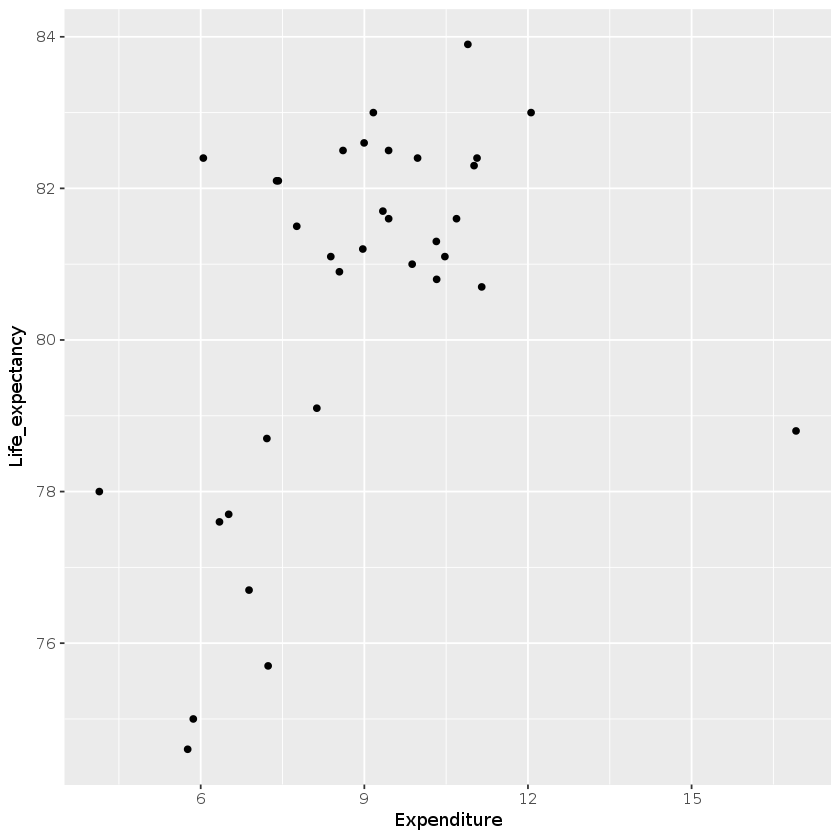

In [31]:
ggplot(sp)+
    geom_point(aes(x=Expenditure, y=Life_expectancy))


Now we will add the names of the countries to the points as labels

Tips:

> the text of a label is an _aesthetic_ (so use: `aes()`) 

> with `geom_text()` it is possible to draw a label


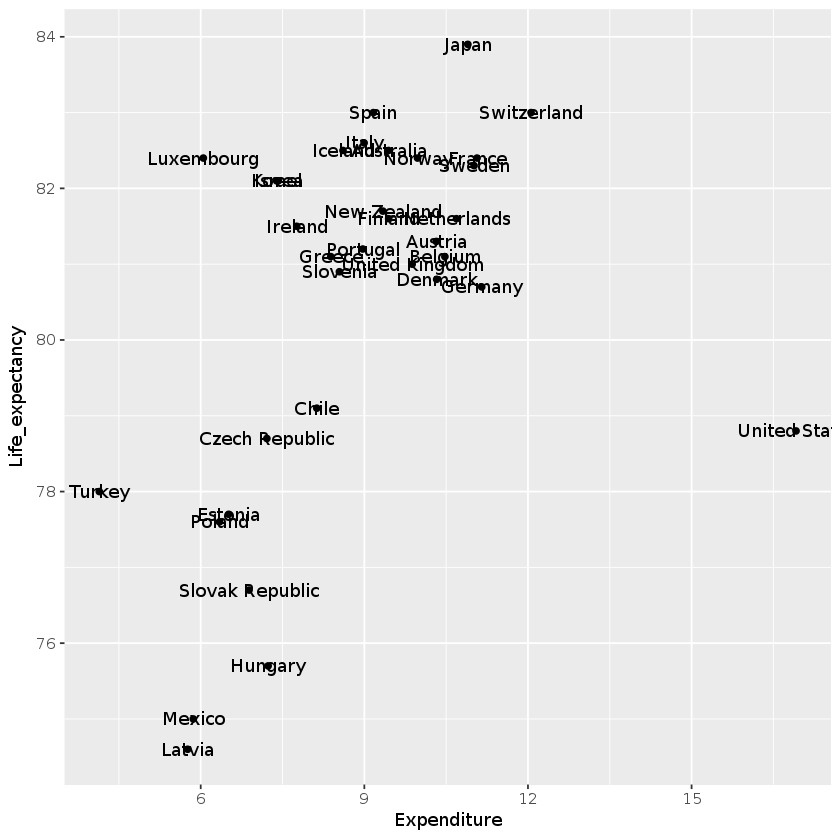

In [40]:
ggplot(sp, aes(x=Expenditure, y=Life_expectancy,label = Country))+
    geom_point()+
    geom_text()


In the plot above we have added names which overlap partially. We can adjust this with a parameter of `geom_text`: you can use the argument `check_overlap = TRUE`

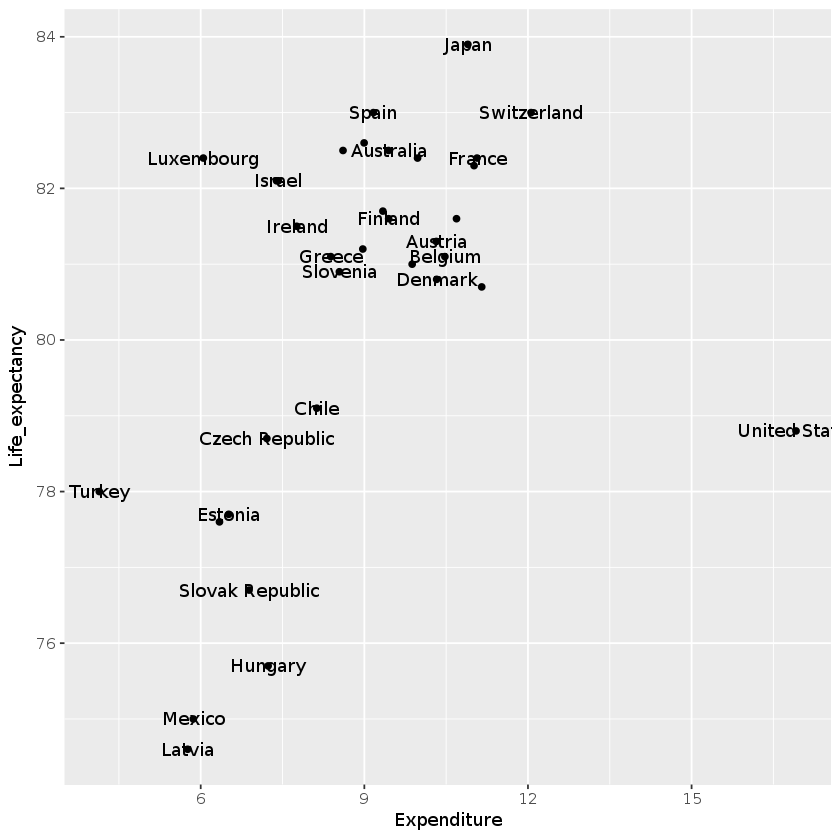

In [42]:
ggplot(sp, aes(x=Expenditure, y=Life_expectancy,label = Country))+
    geom_point()+
    geom_text(check_overlap=TRUE)


As you can see, some labels were removed. If we want to keep all labels without overlap, we need a function to optimize the position of the labels. This function can be found in the package`ggrepel`. We have already loaded the package `ggrepel`.


Warning message:
"Ignoring unknown parameters: check_overlap"

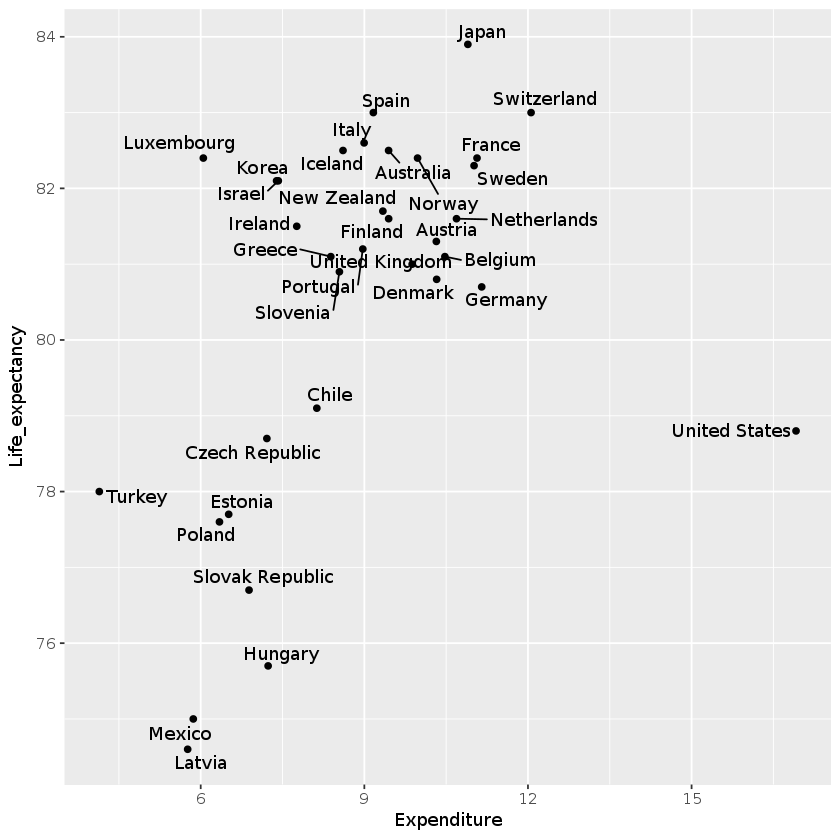

In [43]:
ggplot(sp, aes(x=Expenditure, y=Life_expectancy,label = Country))+
    geom_point()+
    geom_text_repel(check_overlap=TRUE)

Next step is to increase the _size_ of the points to 3 and to make them red with a black boundary.

> Tip: use 2 times `geom_point()`

> The red color is not an aesthetic!

> The create the black boundary

Warning message:
"Ignoring unknown parameters: check_overlap"

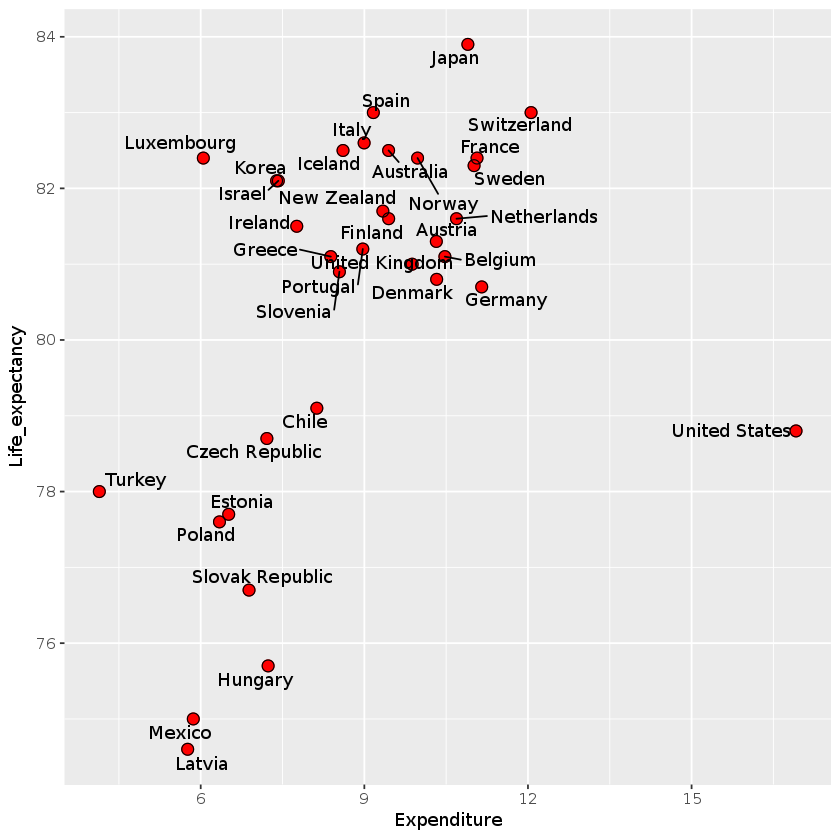

In [45]:
ggplot(sp, aes(x=Expenditure, y=Life_expectancy,label = Country))+
    geom_point(color="red", size=3)+
    geom_point(color="black", shape=1, size=3)+
    geom_text_repel(check_overlap=TRUE)


Add a lineair regression line. A regression line indicates a correlation between 2 variables. Sometimes you may want to add a regression line to your plot. The computer will draw the line that best fits the data. 

Tip:

> Use `geom_smooth` and look for examples [here](http://www.cookbook-r.com/Graphs/Scatterplots_(ggplot2)) .

Warning message:
"Ignoring unknown parameters: check_overlap"

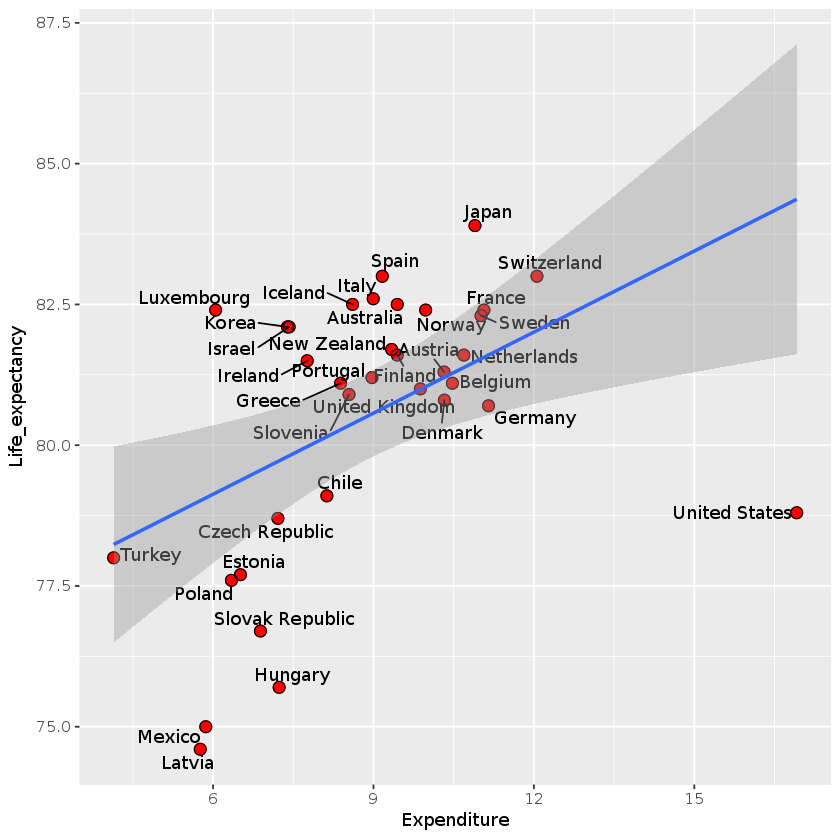

In [46]:
ggplot(sp, aes(x=Expenditure, y=Life_expectancy,label = Country))+
    geom_point(color="red", size=3)+
    geom_point(color="black", shape=1, size=3)+
    geom_text_repel(check_overlap=TRUE)+
    geom_smooth(method="lm")


Now we can change the axis titles. Change "Expenditure", to "Expenditure per capita" and "Life_expectancy" to "Life Expectancy".

Warning message:
"Ignoring unknown parameters: check_overlap"

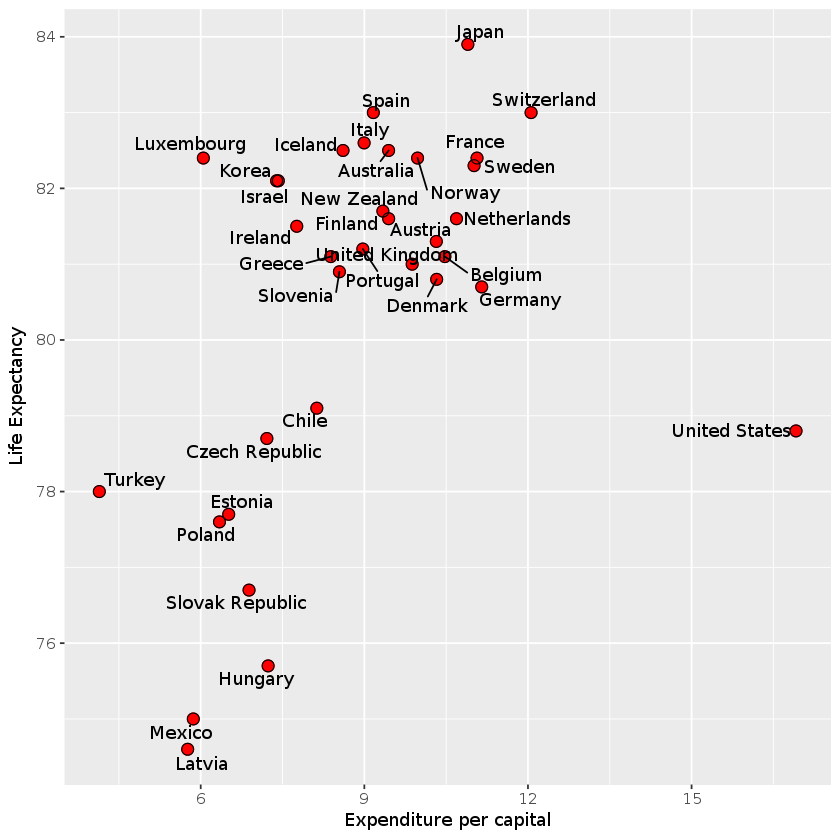

In [47]:
ggplot(sp, aes(x=Expenditure, y=Life_expectancy,label = Country))+
    geom_point(color="red", size=3)+
    geom_point(color="black", shape=1, size=3)+
    geom_text_repel(check_overlap=TRUE)+
    xlab("Expenditure per capital")+
    ylab("Life Expectancy")



The last step is to change the lay out of plot with theme. We will use `theme_classic()`, but you can check other themes as well...

In [ ]:
ggplot(sp, aes(x=Expenditure, y=Life_expectancy,label = Country))+
    geom_point(color="red", size=3)+
    geom_point(color="black", shape=1, size=3)+
    geom_text_repel(check_overlap=TRUE)+
        xlab("Expenditure per capital")+
    ylab("Life Expectancy")+
    theme_classic()+
    geom_smooth(method="lm")
    


Warning message:
"Ignoring unknown parameters: check_overlap"

# Bar charts

We already covered a lot o ground when making the scatterplot. In the following of this notebook we will restrict ourselves to some common issues. The possibilities of `ggplot2` are endless, so keep googling!

Create a data frame with the name *bc* based on *d3* with years 2010 and 2015 and without Canada. Change the variable `Year` to a factor.

In [5]:
bc<- d3 %>%
    filter(Year==2010 | yeah==2015) %>%
    filter(Country!=Canada)

bc$Year<- as.factor(bc$Year)


ERROR: Error in eval(expr, envir, enclos): could not find function "%>%"


Now you can create a bar chart with  `geom_bar()`:

* Country on the x-axis
* Expenditure on the y-axis
* With `fill = Jaar` within the `aes()`


> Hint: you can also produce a barchart specifying only the x-axis. A count of the data will then be presented on the y-axis. In this case we want to specifiy `y` as well. To tell `R` to use the specification of y you should use `stat = "identity"` within the function `geom_bar`.

See for tips and tricks [the `R` cookbook](http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/)

In [13]:
# Student


The plot does not look very nice yet. The first step is to plot the bars of the different years next to each other.

Hint:
> Use `position = "dodge"`within the function `geom_bar()` haakjes.

In [14]:
# Student



Next, we want to 'reorder the Countries' based on expenditure. 

Hint:

> You can use `reorder()` function to do that. You can experiment with trying to get an ascending or descending order.


In [15]:
# Student



It is annoying that the countries are not readable. There are a few options to change that. First we will use the easy way: 

> We can use function  `coord_flip()` to 'flip the graph'.

Since the title of the x-axis is ugly we can use the function `xlab(" ")` to get an empty title for the x-axis.

In [16]:
# Student



Another way to make the labels on the x-axis more readable, is to change the angle of the labels on the x-axis.



Hint: 
> Check  *geom_bar rotate x-axis*

In [17]:
# Student



# Line plots

## Introduction

We will first create a new data frame : We will compare the Netherlands with Germany over times.

1. make a new data frame lp based on d3
2. filter the Netherlands and Germany
3. filter years >= 1970




In [18]:
# Student






We will start with a simple line plot of life expectancy:

- *Year* on the x-axis
- *Life_Expectancy* on the y-axis

Hint:
> Within the line plot (`geom_line()`) we want to group `Country`,you can use the  _aesthetic_ named `colour` to do this.

In [19]:
# Student




Suppose we want to change to line colors to red and blue: 

Hint:
> Check the documentation `geom_line` at _Aesthetics_ to find the correct _aesthetic_. You an use  `scale_color_manual()` to chose color.

In [20]:
# Student



We want to change the size of the line (`size = 1.5`) we will use _theme_minimal_:

Hint:
> Size of the line has nothing to do with a data column, so we don't need to use `aes()`.


In [21]:
# Student



To end the notebook, we will plot points (using `geom_point`) on top of these lines with the same colour as the countries. The size of points should depend on the data in the column *Expenditure*.



Hint:
> Think about the values that should be within and without `aes()`.

In [22]:
# Student

